# Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
%matplotlib inline

sns.set_style('darkgrid')

# 1. Импорт данных

### Подгрузим файлик с описанием фичей и создадим словарик, чтоб можно было посмотреть при необходимости описание нужного признака

In [2]:
desc_dict = {}
with open('data_description.txt', 'r') as f:
    # print(f.readlines())
    for l in f:
        if l not in ['\n', '\t\t\n']:
            print(l.rstrip())
            if not l.startswith(' ') and not l.startswith('\t'):
                lst = l.split(': ')
                desc_dict[lst[0]] = lst[1].rstrip()

desc_dict

MSSubClass: Identifies the type of dwelling involved in the sale.
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
MSZoning: Identifies the general zoning classification of the sale.
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Reside

{'MSSubClass': 'Identifies the type of dwelling involved in the sale.',
 'MSZoning': 'Identifies the general zoning classification of the sale.',
 'LotFrontage': 'Linear feet of street connected to property',
 'LotArea': 'Lot size in square feet',
 'Street': 'Type of road access to property',
 'Alley': 'Type of alley access to property',
 'LotShape': 'General shape of property',
 'LandContour': 'Flatness of the property',
 'Utilities': 'Type of utilities available',
 'LotConfig': 'Lot configuration',
 'LandSlope': 'Slope of property',
 'Neighborhood': 'Physical locations within Ames city limits',
 'Condition1': 'Proximity to various conditions',
 'Condition2': 'Proximity to various conditions (if more than one is present)',
 'BldgType': 'Type of dwelling',
 'HouseStyle': 'Style of dwelling',
 'OverallQual': 'Rates the overall material and finish of the house',
 'OverallCond': 'Rates the overall condition of the house',
 'YearBuilt': 'Original construction date',
 'YearRemodAdd': 'Remod

numeric:   
LotFrontage, LotArea, YearBuilt (преобразовать в Age?), YearRemodAdd (преобразовать в время с ремонта?),  
MasVnrArea (бредовая?), BsmtFinSF1 (бредовая?), BsmtFinSF2 (похоже на предыд.), BsmtUnfSF,  
TotalBsmtSF (=BsmtFinSF1 (или BsmtFinSF2) + BsmtUnfSF), 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea,  
BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces,   
GarageYrBlt (преобразовать в AgeGarage?), GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch,  
3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

### Считаем сами данные

In [3]:
train_df = pd.read_csv('train_house_price.csv', usecols=list(range(1, 81)))
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_df = pd.read_csv('test_house_price.csv', index_col='Id')
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# 2. Data Preprocessing и EDA.

### В задании сказано, что в сабмитах считается RMSE между логарифмом предсказаний и логарифмом истинных цен продажи. Поэтому можно решать сразу задачу предсказания логарифма цены (главное - не забыть взять экспоненту для отправки сабмита). Возьмем логарифм таргета.

In [5]:
# train_df[train_df['SalePrice'] == 0]  # жилья с нулевой ценой нет, поэтому можем смело брать логарифм
train_df['log_SalePrice'] = np.log(train_df['SalePrice'])
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,12.072541
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,12.254863
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,12.493130
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,11.864462


In [6]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
log_SalePrice    float64
Length: 81, dtype: object

In [7]:
train_df.dtypes.value_counts()

object     43
int64      34
float64     4
dtype: int64

In [8]:
train_df.shape, test_df.shape  # размерности выборок 

((1460, 81), (1459, 79))

## 2.1. Работа с пропусками

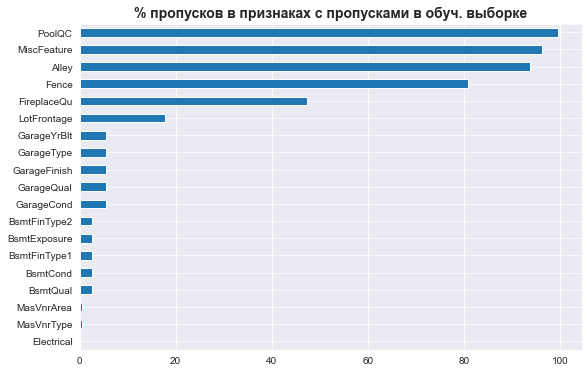

In [9]:
# посмотрим на колонки с пропусками в трейне
def na_perc(df, title, perc_series_return = True):
    df_miss = df.isna().sum() \
                       .loc[lambda x: x > 0] \
                       .sort_values()  # оставим только фичи, где есть пропуски
    df_miss_perc = (df_miss / df.shape[0]) * 100

    plt.figure(figsize=(9, 6))
    plt.title(f'% пропусков в признаках с пропусками в {title}', 
              weight='bold', fontsize=14)
    df_miss_perc.plot(kind='barh')
    plt.show()
    if perc_series_return:
        return df_miss_perc

train_miss_perc = na_perc(train_df, 'обуч. выборке')

In [10]:
train_miss_perc

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

Если нет бассейна (а их нет почти по всех объектах), то пропуск в PoolQC.   
Если нет гаража, то пропуск во всех 5 фичах, начинающихся с Garage.  
Аналогично, с подвалами (Basement): число пропусков в BsmtQual, BsmtCond, BsmtFinType1 одинаковое.                   

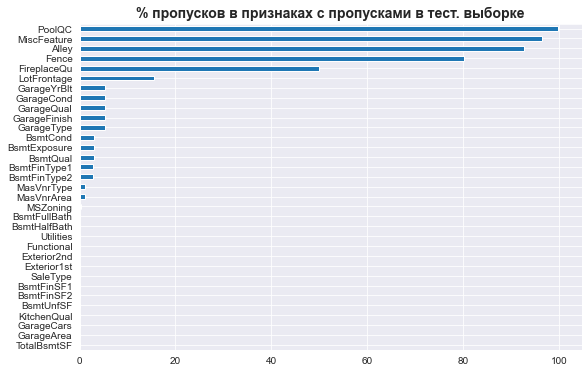

In [11]:
# посмотрим на колонки с пропусками в тесте
test_miss_perc = na_perc(test_df, 'тест. выборке')

Первые 6 фичей с наибольшим числом пропусков совпадают в трейне и тесте. Полный список пересечений:

In [12]:
intersected_miss = set(test_miss_perc.index).intersection(set(train_miss_perc.index))
train_miss_perc.loc[intersected_miss].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
dtype: float64

#### у категориальных фичей, для которых в описании сказано, что NaN означает отсутствие чего-то (например, NaN в PoolQC (качество бассейна) означает отсутствие бассейна, NaN в Alley означает отсутствие подъезда к дому, и т.д.), заполним пропуски словом 'No'

In [13]:
nan_is_no = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
             'PoolQC', 'Fence', 'MiscFeature']
for col in nan_is_no:
    train_df[col] = train_df[col].fillna('No')
    test_df[col] = test_df[col].fillna('No')

Тем не менее, PoolQC, MiscFeature, Alley - практически константные признаки, возможно их имеет смысл дропнуть (или хотя бы поэкспериментировать с этим)

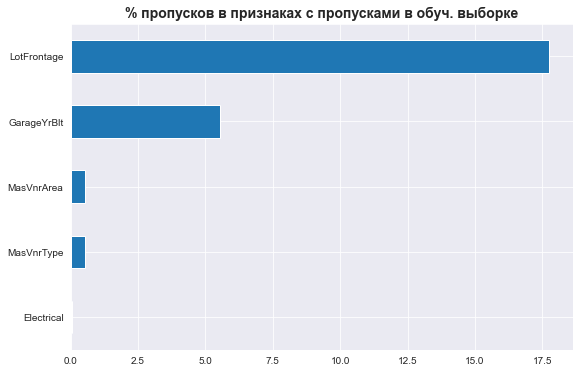

In [14]:
na_perc(train_df, 'обуч. выборке', False)

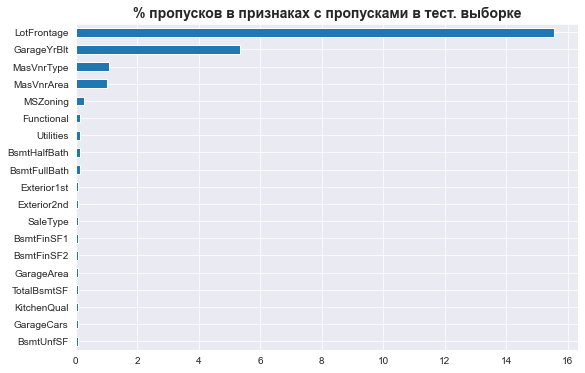

In [15]:
na_perc(test_df, 'тест. выборке', False)

Заполним категориальные Electrical и MasVnrType модой, а континуальные LotFrontage, MasVnrArea средним по
трейну и тесту. Год постройки гаража выкинем из трейна и теста

In [16]:
def fill_mode(df, col):
    df[col] = df[col].fillna(df[col].mode().loc[0])


def fill_mean(df, col):
    df[col] = df[col].fillna(df[col].mean().loc[0])


def fill_mean_train_test(train, test, col):
    mean = pd.concat([train[col], test[col]]).mean()
    train[col] = train[col].fillna(mean)
    test[col] = test[col].fillna(mean)

fill_mode(train_df, 'Electrical')
fill_mode(train_df, 'MasVnrType')

fill_mean_train_test(train_df, test_df, 'LotFrontage')
fill_mean_train_test(train_df, test_df, 'MasVnrArea')

train_df.drop(columns=['GarageYrBlt'], inplace=True)
test_df.drop(columns=['GarageYrBlt'], inplace=True)

создадим списки имен категориальных и числовых фичей

In [17]:
numeric_cols = train_df.select_dtypes([np.number]).columns.to_list()[:-2]  # последние два это таргет
categoric_cols = train_df.select_dtypes([object]).columns.to_list()

In [18]:
# есть категориальные (ординальные) фичи, где лежат числа,
# поэтому надо перекинуть их из списка числовых в категориальные
relocate_l = ['MSSubClass', 'OverallQual', 'OverallCond', 
              'MoSold'] 
for x in relocate_l:
    numeric_cols.remove(x)
    categoric_cols.append(x)

Остались признаки в тестовой выборке с пропусками. Категориальные и ординальные заполним модой (по тесту), а континуальные средним по трейну и тесту

In [19]:
still_na_test = test_df.isna().sum().loc[lambda x: x > 0].index
for col in still_na_test:
    if col in categoric_cols + ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
        fill_mode(test_df, col)
    else:
        fill_mean_train_test(train_df, test_df, col)

In [20]:
train_df.isna().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [21]:
test_df.isna().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

Заполнили все пропуски

### Добавим признаки возраст дома на момент покупки и время с последнего ремонта в трейн и тест. И добавим их названия в список континуальных фичей

In [22]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['RepairAge'] = train_df['YrSold'] - train_df['YearRemodAdd'] 

test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['RepairAge'] = test_df['YrSold'] - test_df['YearRemodAdd'] 
numeric_cols += ['HouseAge', 'RepairAge']

In [23]:
len(numeric_cols)

33

## 2.2. Графический анализ

### Отрисуем зависимость логарифма таргета от каждой из континуальных фичей

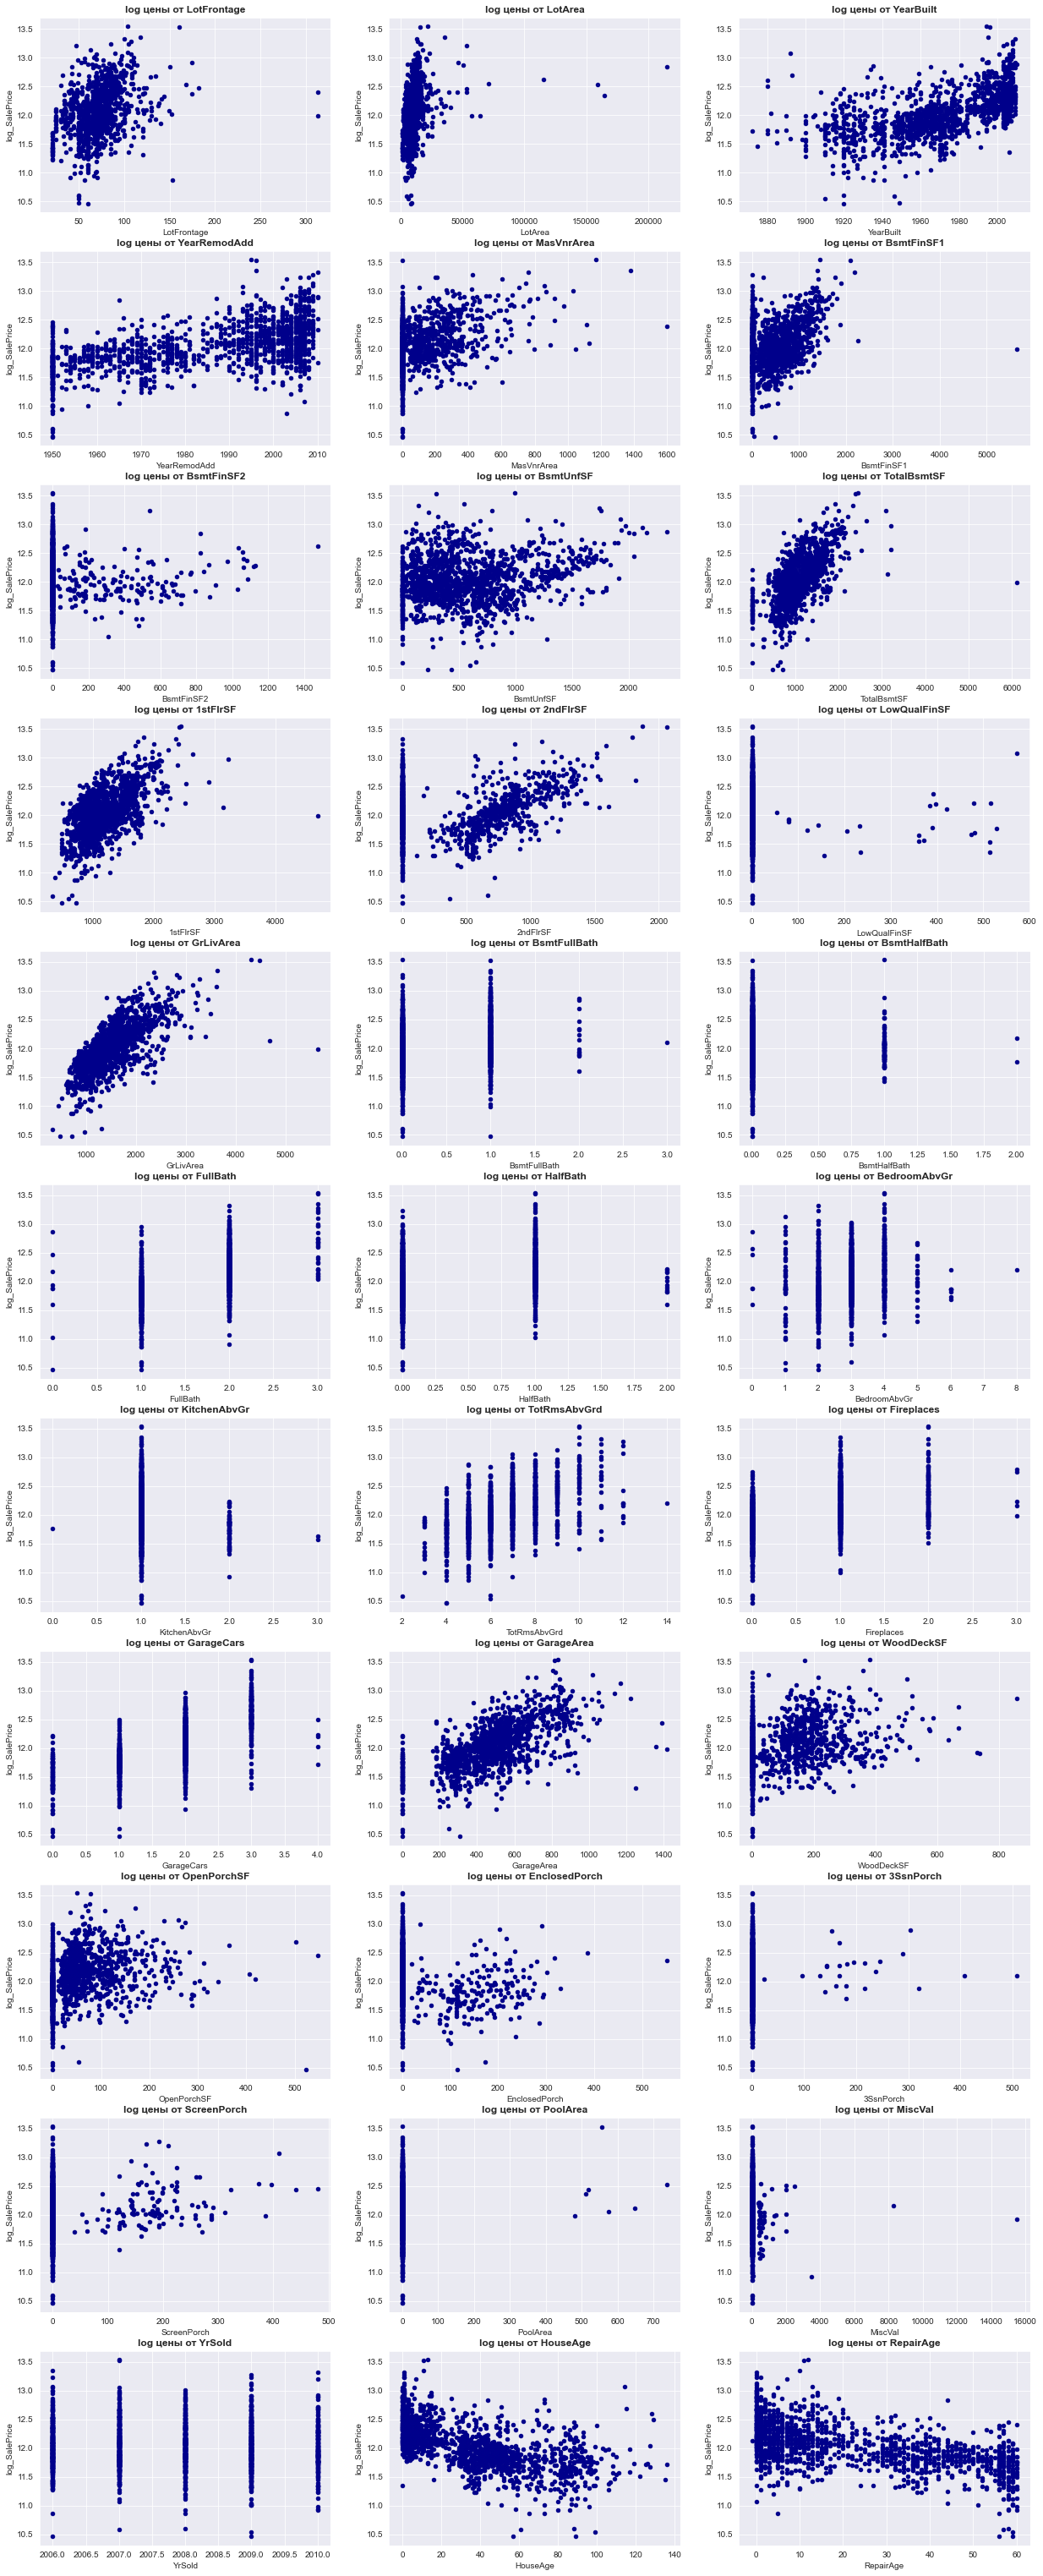

In [24]:
def scatter_plt(df, col_name, ax):
    df.plot(x=col_name, y='log_SalePrice', kind='scatter', 
            ax=ax, c='DarkBlue')
    ax.set_title(f'log цены от {col_name}', fontsize=12, weight='bold')
    
num_rows, num_cols = mt.ceil(len(numeric_cols) / 3), 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 55))
col_l = np.array(numeric_cols).reshape(num_rows, num_cols)

for i in range(num_rows):
    for j in range(num_cols):
        scatter_plt(train_df, col_l[i][j], axs[i][j])   
plt.show()

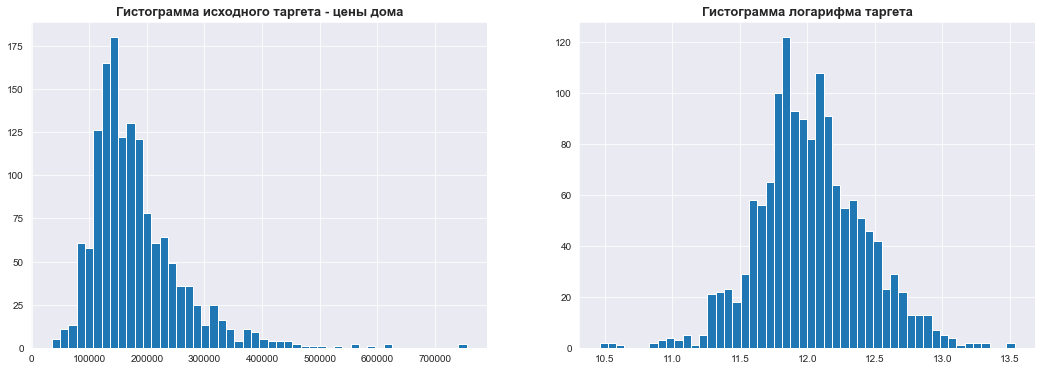

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

train_df['SalePrice'].hist(bins=50, ax=axs[0])
axs[0].set_title('Гистограмма исходного таргета - цены дома', 
          weight='bold', fontsize=13)

train_df['log_SalePrice'].hist(bins=50, ax=axs[1])
axs[1].set_title('Гистограмма логарифма таргета', 
          weight='bold', fontsize=13)

plt.show()

In [26]:
len(numeric_cols), len(categoric_cols)

(33, 47)

In [27]:
# bar-plot для года постройки на трейне и тесте
# train_df['YearBuilt'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6))
# test_df['YearBuilt'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6))
# plt.show()

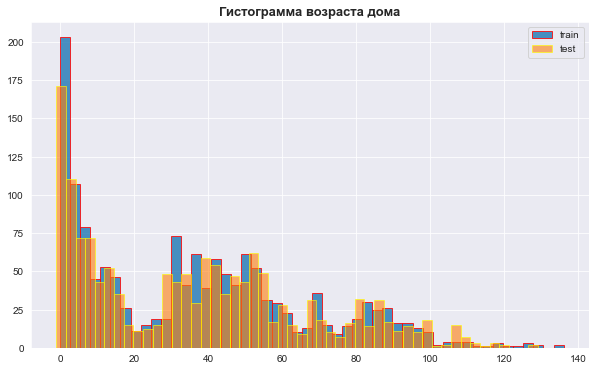

In [27]:
train_df['HouseAge'].hist(bins=50, figsize=(10, 6), alpha=0.8, edgecolor='red', label='train')
test_df['HouseAge'].hist(bins=50, figsize=(10, 6), alpha=0.6, edgecolor='yellow', label='test')
plt.title('Гистограмма возраста дома', 
          weight='bold', fontsize=13)
plt.legend()
plt.show()

Распределения возраста дома на обуч. и тестовой, в целом, довольно близки

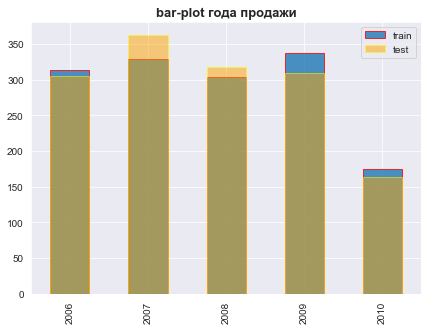

In [28]:
plt.figure(figsize=(7, 5))
train_df['YrSold'].value_counts().sort_index() \
                  .plot(kind='bar', alpha=0.8, edgecolor='red', label='train')
test_df['YrSold'].value_counts().sort_index() \
                  .plot(kind='bar', alpha=0.5, color='orange', edgecolor='yellow', label='test')
plt.title('bar-plot года продажи', 
          weight='bold', fontsize=13)
plt.legend()
plt.show()

Из bar-plota заметно, что маловато представителей 2010 года, но ситуация на трейне и тесте более-менее похожая

In [29]:
to_drop = []  # список признаков, которые в дальнейшем удалим
for x in ['YearBuilt', 'YearRemodAdd', 'YrSold']:
    numeric_cols.remove(x)
    to_drop.append(x)

In [30]:
train_df[numeric_cols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,RepairAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.917946,10516.828082,103.677130,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,36.547945,22.950000
std,22.025858,9981.264932,180.569146,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,30.250152,20.640653
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000
50%,69.305795,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,14.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,41.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,136.000000,60.000000


In [31]:
train_df[['SalePrice', 'log_SalePrice']].describe()

,SalePrice,log_SalePrice
count,1460.000000,1460.000000
mean,180921.195890,12.024051
std,79442.502883,0.399452
min,34900.000000,10.460242
25%,129975.000000,11.775097
50%,163000.000000,12.001505
75%,214000.000000,12.273731
max,755000.000000,13.534473


Отрисуем heatmap'у, чтобы в дальнейшем аргументированно выкинуть какие-то из признаков на основании высокой скоррелированности.

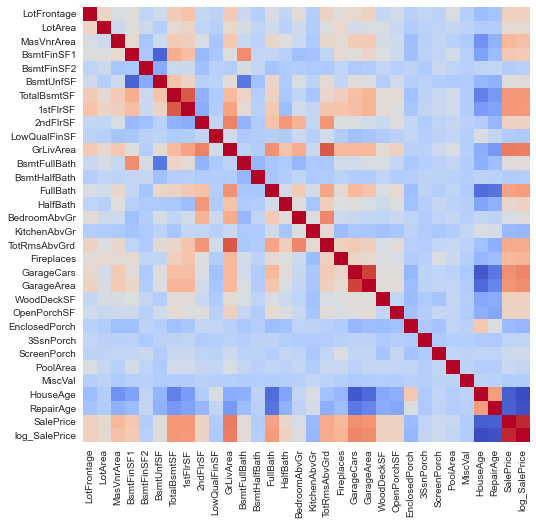

In [32]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(train_df[numeric_cols + ['SalePrice', 'log_SalePrice']].corr(), 
                 cbar=False, cmap='coolwarm')
plt.show() # отрисуем heatmap для анализа корреляции между числовыми признаками

In [33]:
# в numeric_cols всё ещё остались ординальные фичи,
# поэтому надо перекинуть их в список категориальных
relocate_l1 = ['BsmtFullBath', 'BsmtHalfBath',
              'FullBath', 'HalfBath', 'BedroomAbvGr', 
              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
               'GarageCars'] 
for x in relocate_l1:
    numeric_cols.remove(x)
    categoric_cols.append(x)

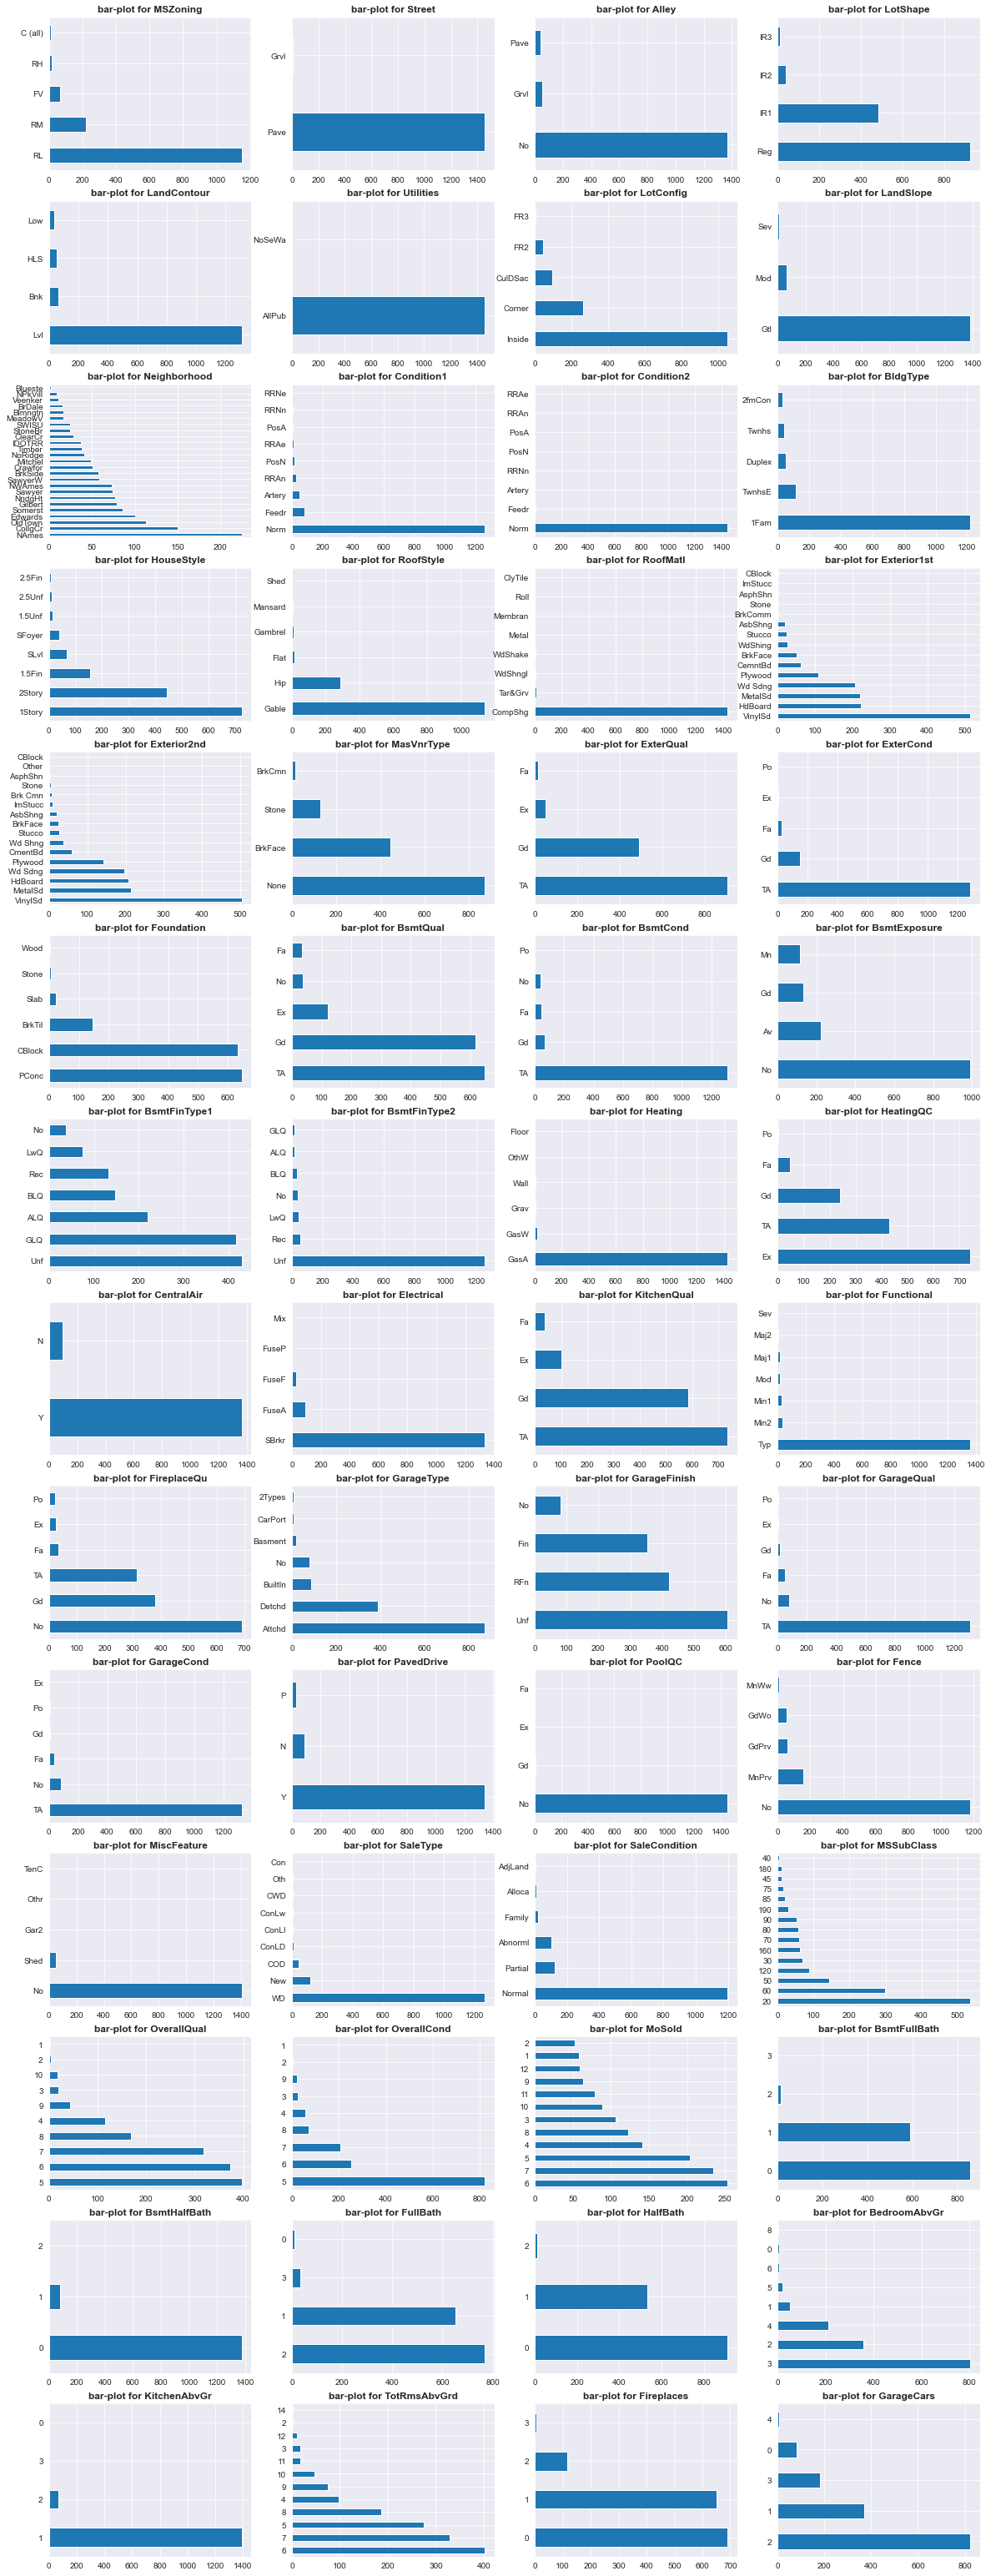

In [34]:
def bar_plt(df, col_name, ax, tick_label=None):
    col_vc = df[col_name].value_counts() \
                         .sort_values(ascending=False)
#     plt.figure(figsize=figsize)
    col_vc.plot(kind='barh', ax=ax, tick_label=tick_label)
    ax.set_title(f'bar-plot for {col_name}', fontsize=12, weight='bold')
    
# num_rows, num_cols = mt.ceil(len(categoric_cols + ['YearBuilt']) / 4), 4
num_rows, num_cols = mt.ceil(len(categoric_cols) / 4), 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 56))
# col_l = np.array(categoric_cols + ['YearBuilt']).reshape(num_rows, num_cols)
col_l = np.array(categoric_cols).reshape(num_rows, num_cols)

for i in range(num_rows):
    for j in range(num_cols):
#         if i != num_rows - 1 or j != num_cols - 1:
        bar_plt(train_df, col_l[i][j], axs[i][j], tick_label=None)
        
# axs[-1, -1].axis('off')    
plt.show()

### Отрисуем ящики с усами для логарифма таргета от каждой из категориальных фичей

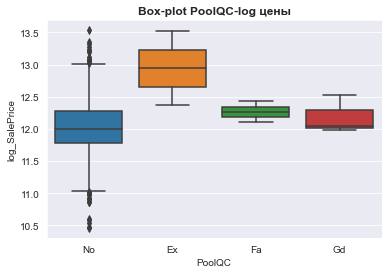

In [35]:
sns.boxplot(x='PoolQC', y='log_SalePrice', data=train_df)
plt.title('Box-plot PoolQC-log цены', weight='bold')
plt.show()

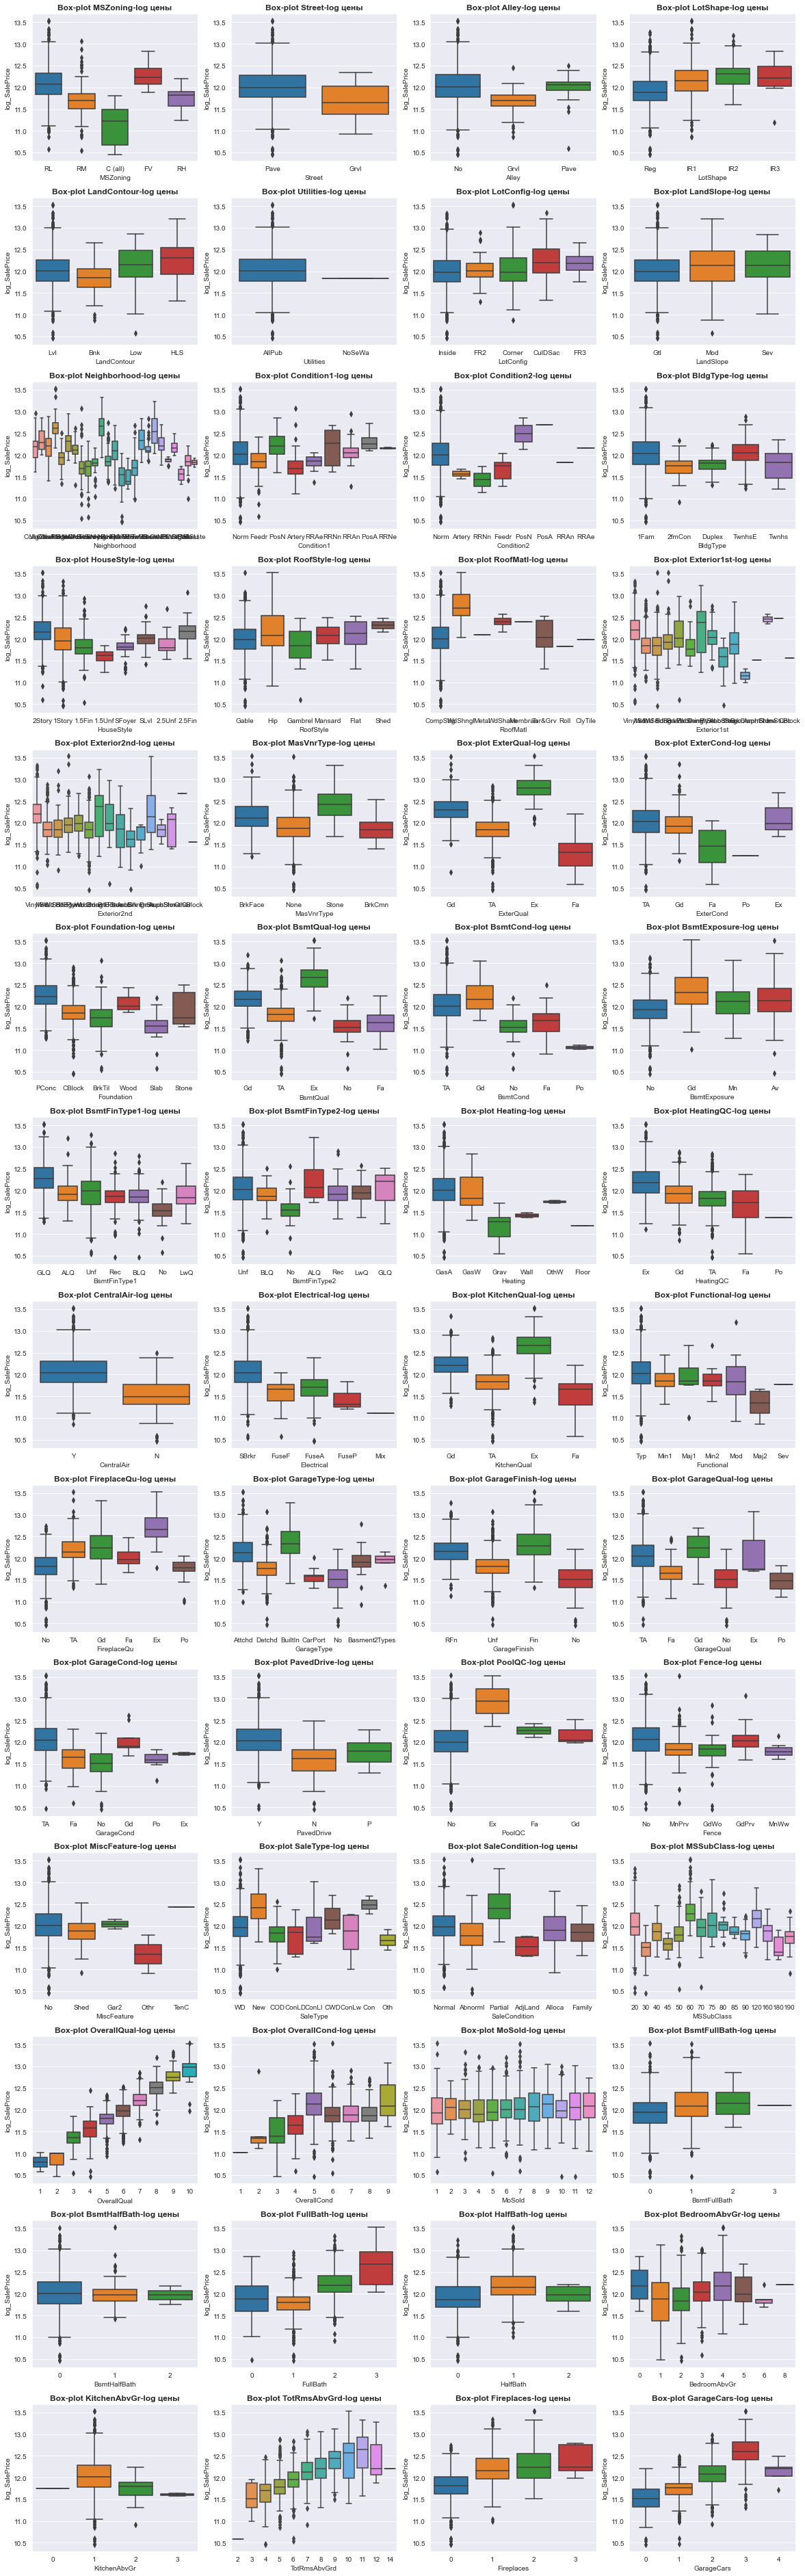

In [36]:
def box_plt(df, col_name, ax):
    sns.boxplot(x=col_name, y='log_SalePrice', data=df, ax=ax)
    ax.set_title(f'Box-plot {col_name}-log цены', 
                 fontsize=12, weight='bold')
    # ax.set_xlabel('')
    
# num_rows, num_cols = mt.ceil(len(categoric_cols + ['YearBuilt']) / 3), 3
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 60))
# col_l = np.array(categoric_cols + ['YearBuilt']).reshape(num_rows, num_cols)

# num_rows, num_cols = mt.ceil(len(categoric_cols + ['YearBuilt']) / 4), 4
num_rows, num_cols = mt.ceil(len(categoric_cols) / 4), 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 56))
# col_l = np.array(categoric_cols + ['YearBuilt']).reshape(num_rows, num_cols)
col_l = np.array(categoric_cols).reshape(num_rows, num_cols)

for i in range(num_rows):
    for j in range(num_cols):
#         if i != num_rows - 1 or j != num_cols - 1:
        box_plt(train_df, col_l[i][j], axs[i][j])

# axs[-1, -1].axis('off')    
fig.subplots_adjust(bottom=0.05, top=0.97, hspace=0.25)
plt.show()

1) Месяц продажи дома (MoSold) кажется по смыслу не сильно влияющей переменной на таргет. Boxplot, вроде бы, это подтверждает. Возможно, выкидываем.  
2) OverallQual (качество материалов и отделки дома) кажется по смыслу довольно значимой и по ящику с усами тоже.  
3) OverallCond (общее качество дома) кажется по смыслу довольно значимой и по ящику с усами тоже.  
4) LandSlope (уклон собственности) кажется не очень значимой, бокс-плот подтверждает.

In [37]:
value_count_d = {}
for c in train_df.columns:
    value_count_d[c] = round(train_df[c].value_counts().max() / len(train_df), 4)

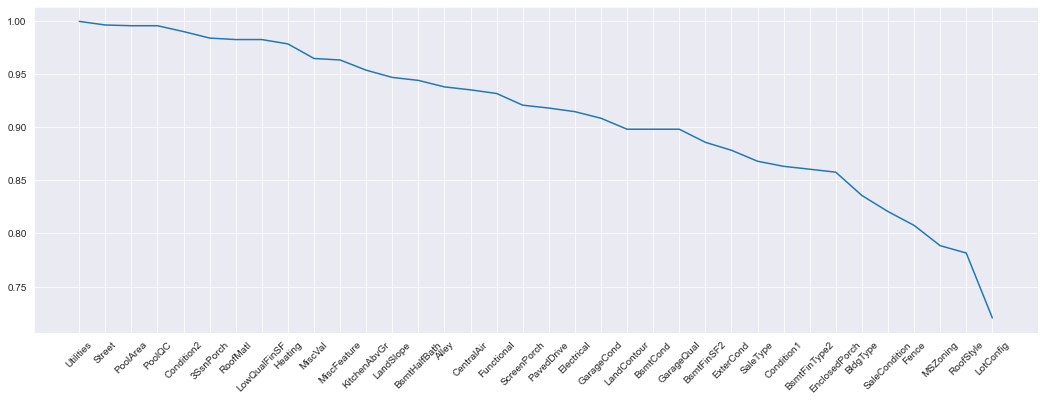

In [38]:
# Посмотрим, насколько вариативна каждая фича. 
# Отрисуем график с максимальной долей одного значения каждого признака
variative = pd.Series(dict(sorted(value_count_d.items(), key=lambda x: x[1],
                      reverse=True))) #.plot(kind='line', figsize=(15, 6))
variative = variative[variative >= 0.7]
plt.figure(figsize=(18, 6))
plt.plot(variative.index, variative.values)
plt.xticks(rotation=45)
plt.show()

In [39]:
len(numeric_cols), len(categoric_cols)

(21, 56)

In [40]:
numeric_cols_copy = numeric_cols[:]
categoric_cols_copy = categoric_cols[:]

In [41]:
def remove_col(col, numeric_cols, categoric_cols):
    if col in numeric_cols:
        numeric_cols.remove(c)
    elif col in categoric_cols:
        categoric_cols.remove(c)


to_drop += [
    'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
    'BsmtFullBath', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'Street', 'Utilities', 'LandSlope', 'Condition2', 'PoolQC', 
    'Fence', 'MiscFeature', 'RoofMatl', 'MoSold', 'HalfBath', 'BedroomAbvGr', 
    'RepairAge' 
]
for c in to_drop:
    # print(c)
    remove_col(c, numeric_cols, categoric_cols)

In [42]:
train_df_prep = train_df.drop(columns=to_drop)
test_df_prep = test_df.drop(columns=to_drop)

In [43]:
train_df_prep.drop(columns='SalePrice', inplace=True)

In [44]:
train_df_prep.shape

(1460, 78)

In [60]:
# train_df_prep.drop(columns='RepairAge', inplace=True)
# test_df_prep.drop(columns='RepairAge', inplace=True)
# numeric_cols.remove('RepairAge')

In [47]:
change_ord_lst = list(train_df_prep.columns[:-1])
change_ord_lst.insert(len(change_ord_lst) - 1, 'HouseAge')
train_df_prep = train_df_prep[change_ord_lst]

In [48]:
train_df_prep.shape

(1460, 77)

In [49]:
train_df_prep

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,HouseAge,log_SalePrice
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,WD,Normal,5,12.247694
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,WD,Normal,31,12.109011
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,WD,Normal,7,12.317167
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,WD,Abnorml,91,11.849398
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,WD,Normal,8,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,8,WD,Normal,8,12.072541
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,2,WD,Normal,32,12.254863
1457,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,5,WD,Normal,69,12.493130
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,4,WD,Normal,60,11.864462


# 3. ML-часть.

Посмотрим на RMSE для наилучшего константного прогноза (среднего)

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(train_df_prep['log_SalePrice'].mean() * np.ones(len(train_df_prep)), 
                   train_df_prep['log_SalePrice'], squared=False)

0.39931504624370256

### Разобьем выборку на трейн и валидацию и отделим порядковые переменные от категориальных, чтобы не применять к ним OneHotEncoding

In [57]:
from sklearn.model_selection import train_test_split
y = train_df_prep['log_SalePrice']
X = train_df_prep.drop(columns=['log_SalePrice'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
ordinal_cols = [
    'OverallQual', 'OverallCond', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageCars'
]

# ordinal_cols = ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
#     'OverallQual', 'OverallCond', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
#     'Fireplaces', 'GarageCars'
# ]

for c in ordinal_cols:
    remove_col(c, numeric_cols, categoric_cols)

## 3.1. Реализация пайплайна, обучение Ridge регрессии

In [63]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categoric_cols),
    ('scaling', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=0.51))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("RMSE на валидационной выборке = %.4f" % mean_squared_error(y_val, y_pred, squared=False))

RMSE на валидационной выборке = 0.1348


## 3.2. Сабмит

In [64]:
test_df_prep.reset_index(drop=True, inplace=True)

In [65]:
predictions = np.exp(model.predict(test_df_prep))
output = pd.DataFrame({'Id': test_df.index, 'SalePrice': predictions})
output.to_csv('submission_sale_price_ridge.csv', index=False)

In [110]:
print("Количество признаков до кодирования OneHot:", X_train.shape[1])
print("Количество признаков после кодирования OneHot:", column_transformer.transform(X_train).shape[1])

Количество признаков до кодирования OneHot: 54
Количество признаков после кодирования OneHot: 301


In [59]:
# column_transformer.transformers_

In [64]:
drop_ind = y_train[(y_train <= 10.8) | (y_train >= 13.2)].index # удалим объекты с большой или маленькой ценой
X_train_filt = X_train.drop(drop_ind)
y_train_filt = y_train.drop(drop_ind)

In [65]:
model = pipeline.fit(X_train_filt, y_train_filt)
y_pred = model.predict(X_val)
print("RMSE на валидационной выборке = %.4f" % mean_squared_error(y_val, y_pred, squared=False))

RMSE на валидационной выборке = 0.1493


### Поищем оптимальный коэффициент регуляризации с помощью GridSearch

Best alpha = 11.9378
Best RMSE = 0.1391


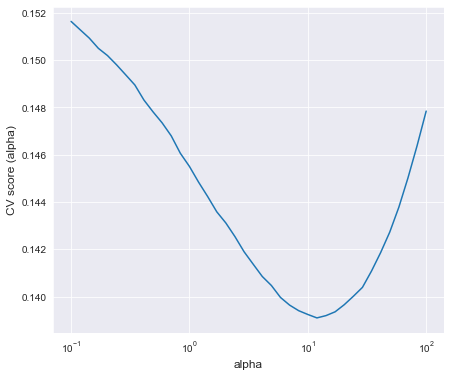

In [111]:
from sklearn.model_selection import GridSearchCV

X_train_transf = column_transformer.fit_transform(X_train)

alphas = np.logspace(-1, 2, 40)
searcher = GridSearchCV(Ridge(), [{'alpha': alphas}], 
                        scoring='neg_root_mean_squared_error', cv=10)

searcher.fit(X_train_transf, y_train)

best_alpha = searcher.best_params_['alpha']
best_score = searcher.best_score_
print("Best alpha = %.4f" % best_alpha)
print("Best RMSE = %.4f" % -best_score)

plt.figure(figsize=(7, 6))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha", fontsize=12)
plt.ylabel("CV score (alpha)", fontsize=12)
plt.show()

In [112]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Val RMSE = %.4f" % mean_squared_error(y_val, y_pred, squared=False))

Val RMSE = 0.1442


In [107]:
predictions = np.exp(model.predict(test_df_prep))
output = pd.DataFrame({'Id': test_df.index, 'SalePrice': predictions})
output.to_csv('submission_sale_price_ridge_cv.csv', index=False)